In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import xlsxwriter

In [45]:
pwd = os.getcwd()

In [46]:
dataset = pd.read_excel(pwd + "/owid-covid-data.xlsx", sheet_name="Sheet1")
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78452,ZWE,Africa,Zimbabwe,2021-03-26,36805.0,27.0,21.857,1518.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78453,ZWE,Africa,Zimbabwe,2021-03-27,36818.0,13.0,22.286,1519.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78454,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,22.429,1520.0,1.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78455,ZWE,Africa,Zimbabwe,2021-03-29,36839.0,17.0,22.143,1520.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [47]:
dataset.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [61]:
dataset_modified = dataset.copy()
dataset_modified

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78452,ZWE,Africa,Zimbabwe,2021-03-26,36805.0,27.0,21.857,1518.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78453,ZWE,Africa,Zimbabwe,2021-03-27,36818.0,13.0,22.286,1519.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78454,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,22.429,1520.0,1.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78455,ZWE,Africa,Zimbabwe,2021-03-29,36839.0,17.0,22.143,1520.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [62]:
columns_to_drop = ['new_cases_smoothed',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million','total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
dataset_modified = dataset_modified.drop(columns=columns_to_drop)
dataset_modified

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78452,ZWE,Africa,Zimbabwe,2021-03-26,36805.0,27.0,1518.0,0.0,NaN,3074.0,428623.0,61093.0,14862927.0
78453,ZWE,Africa,Zimbabwe,2021-03-27,36818.0,13.0,1519.0,1.0,NaN,1990.0,430613.0,65466.0,14862927.0
78454,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,1520.0,1.0,NaN,NaN,NaN,68511.0,14862927.0
78455,ZWE,Africa,Zimbabwe,2021-03-29,36839.0,17.0,1520.0,0.0,NaN,NaN,NaN,69751.0,14862927.0


In [63]:
dataset_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78457 entries, 0 to 78456
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           78457 non-null  object 
 1   continent          74625 non-null  object 
 2   location           78457 non-null  object 
 3   date               78457 non-null  object 
 4   total_cases        76903 non-null  float64
 5   new_cases          76901 non-null  float64
 6   total_deaths       67514 non-null  float64
 7   new_deaths         67672 non-null  float64
 8   hosp_patients      9750 non-null   float64
 9   new_tests          35926 non-null  float64
 10  total_tests        35697 non-null  float64
 11  people_vaccinated  5317 non-null   float64
 12  population         77968 non-null  float64
dtypes: float64(9), object(4)
memory usage: 7.8+ MB


In [64]:
dataset_modified["date"] = pd.to_datetime(dataset_modified["date"])

In [65]:
dataset_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78457 entries, 0 to 78456
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   iso_code           78457 non-null  object        
 1   continent          74625 non-null  object        
 2   location           78457 non-null  object        
 3   date               78457 non-null  datetime64[ns]
 4   total_cases        76903 non-null  float64       
 5   new_cases          76901 non-null  float64       
 6   total_deaths       67514 non-null  float64       
 7   new_deaths         67672 non-null  float64       
 8   hosp_patients      9750 non-null   float64       
 9   new_tests          35926 non-null  float64       
 10  total_tests        35697 non-null  float64       
 11  people_vaccinated  5317 non-null   float64       
 12  population         77968 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 7.8

In [91]:
dataset_modified.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0


In [72]:
dataset_modified["iso_code"] = dataset_modified["iso_code"].astype('str')
dataset_modified["continent"] = dataset_modified["continent"].astype('str')
dataset_modified["location"] = dataset_modified["location"].astype('str')
dataset_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78457 entries, 0 to 78456
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   iso_code           78457 non-null  object        
 1   continent          78457 non-null  object        
 2   location           78457 non-null  object        
 3   date               78457 non-null  datetime64[ns]
 4   total_cases        76903 non-null  float64       
 5   new_cases          76901 non-null  float64       
 6   total_deaths       67514 non-null  float64       
 7   new_deaths         67672 non-null  float64       
 8   hosp_patients      9750 non-null   float64       
 9   new_tests          35926 non-null  float64       
 10  total_tests        35697 non-null  float64       
 11  people_vaccinated  5317 non-null   float64       
 12  population         77968 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 7.8

In [128]:
continents = dataset_modified[dataset_modified["continent"] == "nan"]
continents

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
401,OWID_AFR,nan,Africa,2020-02-13,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1.340598e+09
402,OWID_AFR,nan,Africa,2020-02-14,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,1.340598e+09
403,OWID_AFR,nan,Africa,2020-02-15,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1.340598e+09
404,OWID_AFR,nan,Africa,2020-02-16,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1.340598e+09
405,OWID_AFR,nan,Africa,2020-02-17,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1.340598e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77343,OWID_WRL,nan,World,2021-03-26,126131572.0,641198.0,2767631.0,12188.0,NaN,NaN,NaN,304655904.0,7.794799e+09
77344,OWID_WRL,nan,World,2021-03-27,126715405.0,583833.0,2777421.0,9790.0,NaN,NaN,NaN,311348811.0,7.794799e+09
77345,OWID_WRL,nan,World,2021-03-28,127185829.0,470424.0,2783885.0,6464.0,NaN,NaN,NaN,315495583.0,7.794799e+09
77346,OWID_WRL,nan,World,2021-03-29,127644757.0,458928.0,2791836.0,7951.0,NaN,NaN,NaN,321962376.0,7.794799e+09


In [130]:
continents["location"].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

In [141]:
continents = continents[continents["location"] != "European Union"]
continents = continents[continents["location"] != "International"]
continents = continents[continents["location"] != "World"]
continents["location"].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [142]:
current_day_continents = continents[continents["date"] == "2021-03-30"]
current_day_continents

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
812,OWID_AFR,nan,Africa,2021-03-30,4204561.0,9762.0,112502.0,277.0,NaN,NaN,NaN,6589003.0,1.340598e+09
4093,OWID_ASI,nan,Asia,2021-03-30,28323783.0,161222.0,426628.0,1262.0,NaN,NaN,NaN,92743109.0,4.639847e+09
24232,OWID_EUR,nan,Europe,2021-03-30,39592373.0,204845.0,911194.0,3971.0,NaN,NaN,NaN,91718619.0,7.486801e+08
51986,OWID_NAM,nan,North America,2021-03-30,35050360.0,74767.0,804556.0,1777.0,NaN,NaN,NaN,108790834.0,5.920722e+08
53289,OWID_OCE,nan,Oceania,2021-03-30,37517.0,281.0,993.0,7.0,NaN,NaN,NaN,200794.0,4.267781e+07
65515,OWID_SAM,nan,South America,2021-03-30,21003564.0,117245.0,547509.0,4267.0,NaN,NaN,NaN,27169805.0,4.307598e+08


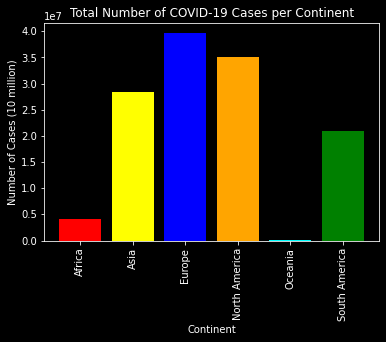

In [154]:
CONT_CASE_TITLE = "Total Number of COVID-19 Cases per Continent"
CONT_XLABEL = "Continent"
CASES_YLABEL = "Number of Cases (10 million)"
plt.style.use("dark_background")
plt.bar(current_day_continents["location"], current_day_continents["total_cases"], color=["Red", "Yellow", "Blue", "Orange", "Cyan", "Green"])
plt.title(CONT_CASE_TITLE)
plt.xlabel(CONT_XLABEL)
plt.ylabel(CASES_YLABEL)
plt.xticks(rotation=90)
plt.show()

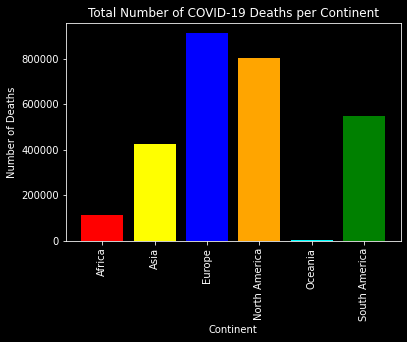

In [155]:
CONT_DEATH_TITLE = "Total Number of COVID-19 Deaths per Continent"
DEATHS_YLABEL = "Number of Deaths"
plt.style.use("dark_background")
plt.bar(current_day_continents["location"], current_day_continents["total_deaths"], color=["Red", "Yellow", "Blue", "Orange", "Cyan", "Green"])
plt.title(CONT_DEATH_TITLE)
plt.xlabel(CONT_XLABEL)
plt.ylabel(DEATHS_YLABEL)
plt.xticks(rotation=90)
plt.show()

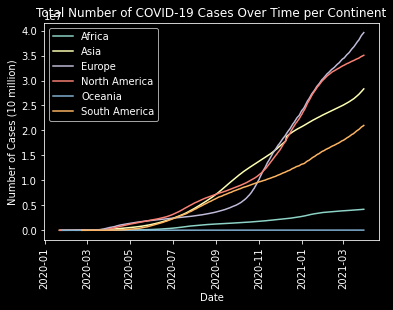

In [162]:
africa = continents[continents["location"] == "Africa"]
asia = continents[continents["location"] == "Asia"]
europe = continents[continents["location"] == "Europe"]
north_america = continents[continents["location"] == "North America"]
oceania = continents[continents["location"] == "Oceania"]
south_america = continents[continents["location"] == "South America"]

CONT_CASES_OVER_TIME_TITLE = "Total Number of COVID-19 Cases Over Time per Continent"
plt.plot(africa["date"], africa["total_cases"], label="Africa")
plt.plot(asia["date"], asia["total_cases"], label="Asia")
plt.plot(europe["date"], europe["total_cases"], label="Europe")
plt.plot(north_america["date"], north_america["total_cases"], label="North America")
plt.plot(oceania["date"], oceania["total_cases"], label="Oceania")
plt.plot(south_america["date"], south_america["total_cases"], label="South America")
plt.legend()
plt.title(CONT_CASES_OVER_TIME_TITLE)
plt.xlabel("Date")
plt.ylabel(CASES_YLABEL)
plt.xticks(rotation=90)
plt.show()

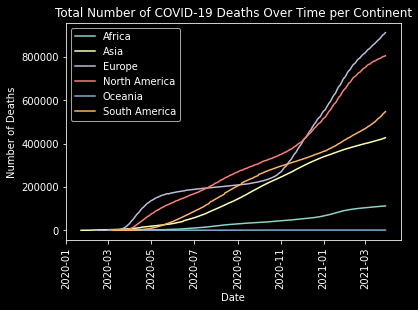

In [163]:
CONT_DEATHS_OVER_TIME_TITLE = "Total Number of COVID-19 Deaths Over Time per Continent"
plt.plot(africa["date"], africa["total_deaths"], label="Africa")
plt.plot(asia["date"], asia["total_deaths"], label="Asia")
plt.plot(europe["date"], europe["total_deaths"], label="Europe")
plt.plot(north_america["date"], north_america["total_deaths"], label="North America")
plt.plot(oceania["date"], oceania["total_deaths"], label="Oceania")
plt.plot(south_america["date"], south_america["total_deaths"], label="South America")
plt.legend()
plt.title(CONT_DEATHS_OVER_TIME_TITLE)
plt.xlabel("Date")
plt.ylabel(DEATHS_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [139]:
countries = dataset_modified[dataset_modified["continent"] != "nan"]
countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78452,ZWE,Africa,Zimbabwe,2021-03-26,36805.0,27.0,1518.0,0.0,NaN,3074.0,428623.0,61093.0,14862927.0
78453,ZWE,Africa,Zimbabwe,2021-03-27,36818.0,13.0,1519.0,1.0,NaN,1990.0,430613.0,65466.0,14862927.0
78454,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,1520.0,1.0,NaN,NaN,NaN,68511.0,14862927.0
78455,ZWE,Africa,Zimbabwe,2021-03-29,36839.0,17.0,1520.0,0.0,NaN,NaN,NaN,69751.0,14862927.0


In [164]:
current_day_countries = countries[countries["date"] == "2021-03-30"]
current_day_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
400,AFG,Asia,Afghanistan,2021-03-30,56384.0,62.0,2476.0,4.0,NaN,NaN,NaN,NaN,38928341.0
1212,ALB,Europe,Albania,2021-03-30,124723.0,304.0,2227.0,11.0,NaN,NaN,NaN,NaN,2877800.0
1612,DZA,Africa,Algeria,2021-03-30,117061.0,115.0,3089.0,5.0,NaN,NaN,NaN,NaN,43851043.0
2006,AND,Europe,Andorra,2021-03-30,11944.0,56.0,115.0,0.0,NaN,NaN,NaN,NaN,77265.0
2382,AGO,Africa,Angola,2021-03-30,22182.0,50.0,536.0,2.0,NaN,NaN,NaN,NaN,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76480,VEN,South America,Venezuela,2021-03-30,159149.0,1206.0,1589.0,12.0,NaN,NaN,NaN,NaN,28435943.0
76913,VNM,Asia,Vietnam,2021-03-30,2594.0,0.0,35.0,0.0,NaN,NaN,NaN,NaN,97338583.0
77702,YEM,Asia,Yemen,2021-03-30,4247.0,132.0,882.0,19.0,NaN,NaN,NaN,NaN,29825968.0
78080,ZMB,Africa,Zambia,2021-03-30,88199.0,187.0,1202.0,2.0,NaN,NaN,NaN,NaN,18383956.0


In [165]:
top_cases_countries = current_day_countries.nlargest(10, "total_cases")
top_cases_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
74803,USA,North America,United States,2021-03-30,30393701.0,61240.0,550996.0,875.0,NaN,NaN,NaN,96044046.0,3.310026e+08
10450,BRA,South America,Brazil,2021-03-30,12658109.0,84494.0,317646.0,3780.0,NaN,NaN,NaN,14112509.0,2.125594e+08
32619,IND,Asia,India,2021-03-30,12149335.0,53480.0,162468.0,354.0,NaN,785864.0,242650025.0,53989035.0,1.380004e+09
26059,FRA,Europe,France,2021-03-30,4646014.0,30719.0,95495.0,381.0,NaN,NaN,NaN,NaN,6.814769e+07
58513,RUS,Europe,Russia,2021-03-30,4486078.0,8162.0,96817.0,404.0,NaN,NaN,NaN,6886259.0,1.459345e+08
74369,GBR,Europe,United Kingdom,2021-03-30,4355867.0,4071.0,126912.0,55.0,NaN,NaN,NaN,NaN,6.788600e+07
35537,ITA,Europe,Italy,2021-03-30,3561012.0,16055.0,108879.0,529.0,NaN,NaN,NaN,6816584.0,6.046183e+07
72678,TUR,Asia,Turkey,2021-03-30,3277880.0,37303.0,31385.0,155.0,NaN,NaN,NaN,8614368.0,8.433907e+07
66734,ESP,Europe,Spain,2021-03-30,3275819.0,4994.0,75305.0,106.0,NaN,NaN,NaN,5092535.0,4.675478e+07
27648,DEU,Europe,Germany,2021-03-30,2818630.0,23681.0,76389.0,250.0,NaN,NaN,NaN,9421702.0,8.378394e+07


In [167]:
bottom_cases_countries = current_day_countries.nsmallest(10, "total_cases")
bottom_cases_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population
46043,FSM,Oceania,Micronesia (country),2021-03-30,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,115021.0
60204,WSM,Oceania,Samoa,2021-03-30,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,198410.0
75708,VUT,Oceania,Vanuatu,2021-03-30,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,307150.0
44759,MHL,Oceania,Marshall Islands,2021-03-30,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59194.0
64314,SLB,Oceania,Solomon Islands,2021-03-30,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,686878.0
76098,VAT,Europe,Vatican,2021-03-30,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,809.0
59307,KNA,North America,Saint Kitts and Nevis,2021-03-30,44.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53192.0
39115,LAO,Asia,Laos,2021-03-30,49.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7275556.0
25200,FJI,Oceania,Fiji,2021-03-30,67.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,896444.0
28920,GRD,North America,Grenada,2021-03-30,155.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,112519.0


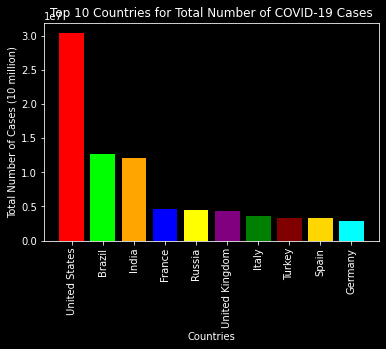

In [173]:
TOP10_COUNTRY_CASES_TITLE = "Top 10 Countries for Total Number of COVID-19 Cases"
COUNTRIES_XLABEL = "Countries"
COUNTRIES_CASES_YLABEL = "Total Number of Cases (10 million)"
COLORS = ["Red", "Lime", "Orange", "Blue", "Yellow", "Purple", "Green", "Maroon", "Gold", "Cyan"]
plt.style.use("dark_background")
plt.bar(top_cases_countries["location"], top_cases_countries["total_cases"], color=COLORS)
plt.title(TOP10_COUNTRY_CASES_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(COUNTRIES_CASES_YLABEL)
plt.xticks(rotation=90)
plt.show()

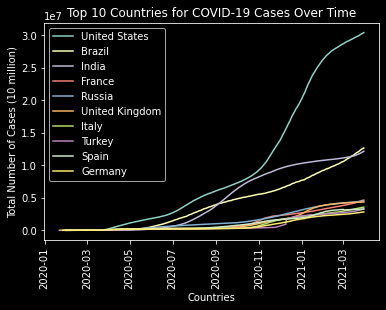

In [175]:
united_states = countries[countries["location"] == "United States"]
brazil = countries[countries["location"] == "Brazil"]
india = countries[countries["location"] == "India"]
france = countries[countries["location"] == "France"]
russia = countries[countries["location"] == "Russia"]
united_kingdom = countries[countries["location"] == "United Kingdom"]
italy = countries[countries["location"] == "Italy"]
turkey = countries[countries["location"] == "Turkey"]
spain = countries[countries["location"] == "Spain"]
germany = countries[countries["location"] == "Germany"]

TOP10_COUNTRIES_CASES_OVER_TIME_TITLE = "Top 10 Countries for COVID-19 Cases Over Time"
plt.plot(united_states["date"], united_states["total_cases"], label="United States")
plt.plot(brazil["date"], brazil["total_cases"], label="Brazil")
plt.plot(india["date"], india["total_cases"], label="India")
plt.plot(france["date"], france["total_cases"], label="France")
plt.plot(russia["date"], russia["total_cases"], label="Russia")
plt.plot(united_kingdom["date"], united_kingdom["total_cases"], label="United Kingdom")
plt.plot(italy["date"], italy["total_cases"], label="Italy")
plt.plot(turkey["date"], turkey["total_cases"], label="Turkey")
plt.plot(spain["date"], spain["total_cases"], label="Spain")
plt.plot(germany["date"], germany["total_cases"], label="Germany")
plt.legend()
plt.title(TOP10_COUNTRIES_CASES_OVER_TIME_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(COUNTRIES_CASES_YLABEL)
plt.xticks(rotation=90)
plt.show()

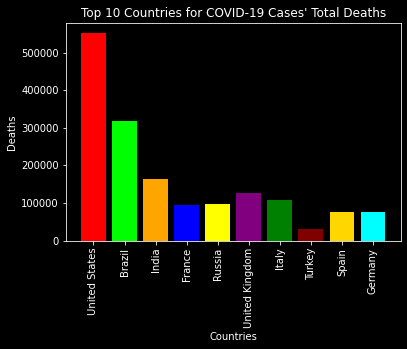

In [176]:
TOP10_COUNTRIES_DEATHS_TITLE = "Top 10 Countries for COVID-19 Cases' Total Deaths"
COUNTRIES_DEATHS_YLABEL = "Deaths"
plt.bar(top_cases_countries["location"], top_cases_countries["total_deaths"], color=COLORS)
plt.title(TOP10_COUNTRIES_DEATHS_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(COUNTRIES_DEATHS_YLABEL)
plt.xticks(rotation=90)
plt.show()

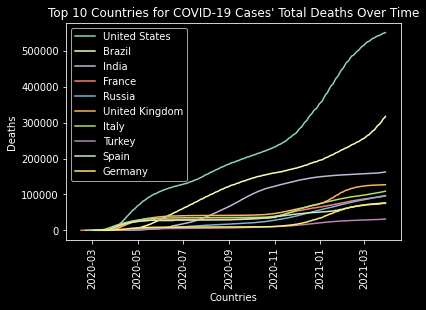

In [177]:
TOP10_COUNTRIES_DEATHS_OVER_TIME_TITLE = "Top 10 Countries for COVID-19 Cases' Total Deaths Over Time"
plt.plot(united_states["date"], united_states["total_deaths"], label="United States")
plt.plot(brazil["date"], brazil["total_deaths"], label="Brazil")
plt.plot(india["date"], india["total_deaths"], label="India")
plt.plot(france["date"], france["total_deaths"], label="France")
plt.plot(russia["date"], russia["total_deaths"], label="Russia")
plt.plot(united_kingdom["date"], united_kingdom["total_deaths"], label="United Kingdom")
plt.plot(italy["date"], italy["total_deaths"], label="Italy")
plt.plot(turkey["date"], turkey["total_deaths"], label="Turkey")
plt.plot(spain["date"], spain["total_deaths"], label="Spain")
plt.plot(germany["date"], germany["total_deaths"], label="Germany")
plt.legend()
plt.title(TOP10_COUNTRIES_DEATHS_OVER_TIME_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(COUNTRIES_DEATHS_YLABEL)
plt.xticks(rotation=90)
plt.show()

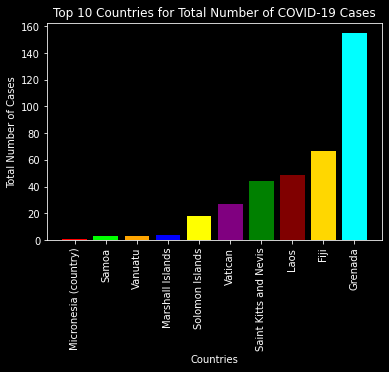

In [179]:
BOTTOM10_COUNTRY_CASES_TITLE = "Top 10 Countries for Total Number of COVID-19 Cases"
BOTTOM10_COUNTRIES_CASES_YLABEL = "Total Number of Cases"
plt.bar(bottom_cases_countries["location"], bottom_cases_countries["total_cases"], color=COLORS)
plt.title(BOTTOM10_COUNTRY_CASES_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(BOTTOM10_COUNTRIES_CASES_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [185]:
current_day_countries["percentage_sick"] = (current_day_countries["total_cases"] / current_day_countries["population"]) * 100
current_day_countries["percentage_sick"]

<ipython-input-185-f7351ca38dcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_day_countries["percentage_sick"] = (current_day_countries["total_cases"] / current_day_countries["population"]) * 100


400       0.144840
1212      4.333970
1612      0.266951
2006     15.458487
2382      0.067492
           ...    
76480     0.559675
76913     0.002665
77702     0.014239
78080     0.479761
78456     0.247858
Name: percentage_sick, Length: 193, dtype: float64

In [186]:
top10_percentage_sick_countries = current_day_countries.nlargest(10, "percentage_sick")
top10_percentage_sick_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population,percentage_sick
2006,AND,Europe,Andorra,2021-03-30,11944.0,56.0,115.0,0.0,NaN,NaN,NaN,NaN,77265.0,15.458487
47592,MNE,Europe,Montenegro,2021-03-30,90832.0,414.0,1266.0,10.0,NaN,NaN,NaN,17906.0,628062.0,14.462266
18740,CZE,Europe,Czechia,2021-03-30,1523668.0,6896.0,26222.0,186.0,NaN,NaN,NaN,1170662.0,10708982.0,14.227944
60602,SMR,Europe,San Marino,2021-03-30,4678.0,47.0,84.0,0.0,NaN,NaN,NaN,8646.0,33938.0,13.783959
64144,SVN,Europe,Slovenia,2021-03-30,214045.0,1079.0,4040.0,16.0,NaN,NaN,NaN,NaN,2078932.0,10.295912
42203,LUX,Europe,Luxembourg,2021-03-30,61255.0,182.0,743.0,2.0,NaN,NaN,NaN,NaN,625976.0,9.785519
35112,ISR,Asia,Israel,2021-03-30,832639.0,514.0,6193.0,-4.0,NaN,NaN,NaN,5236330.0,8655541.0,9.619722
74803,USA,North America,United States,2021-03-30,30393701.0,61240.0,550996.0,875.0,NaN,NaN,NaN,96044046.0,331002647.0,9.182314
62151,SRB,Europe,Serbia,2021-03-30,595489.0,9983.0,5270.0,80.0,NaN,NaN,NaN,1414983.0,6804596.0,8.751276
6099,BHR,Asia,Bahrain,2021-03-30,143574.0,905.0,517.0,2.0,NaN,16616.0,3547638.0,502541.0,1701583.0,8.437672


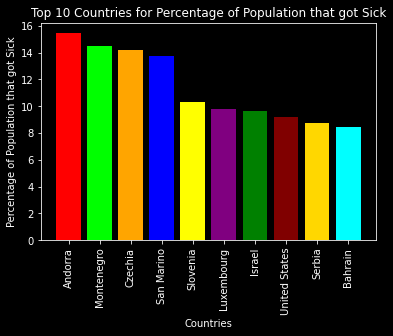

In [188]:
TOP10_PERCENTAGE_SICK_TITLE = "Top 10 Countries for Percentage of Population that got Sick"
TOP10_PERCENTAGE_SICK_YLABEL = "Percentage of Population that got Sick"
plt.bar(top10_percentage_sick_countries["location"], top10_percentage_sick_countries["percentage_sick"], color=COLORS)
plt.title(TOP10_PERCENTAGE_SICK_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(TOP10_PERCENTAGE_SICK_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [189]:
bottom10_percentage_sick_countries = current_day_countries.nsmallest(10, "percentage_sick")
bottom10_percentage_sick_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population,percentage_sick
39115,LAO,Asia,Laos,2021-03-30,49.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.275556e+06,0.000673
70301,TZA,Africa,Tanzania,2021-03-30,509.0,0.0,21.0,0.0,NaN,NaN,NaN,NaN,5.973421e+07,0.000852
46043,FSM,Oceania,Micronesia (country),2021-03-30,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.150210e+05,0.000869
75708,VUT,Oceania,Vanuatu,2021-03-30,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.071500e+05,0.000977
60204,WSM,Oceania,Samoa,2021-03-30,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.984100e+05,0.001512
64314,SLB,Oceania,Solomon Islands,2021-03-30,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.868780e+05,0.002621
76913,VNM,Asia,Vietnam,2021-03-30,2594.0,0.0,35.0,0.0,NaN,NaN,NaN,NaN,9.733858e+07,0.002665
69586,TWN,Asia,Taiwan,2021-03-30,1024.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,2.381678e+07,0.004299
44759,MHL,Oceania,Marshall Islands,2021-03-30,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.919400e+04,0.006757
15289,CHN,Asia,China,2021-03-30,101710.0,18.0,4841.0,0.0,NaN,NaN,NaN,NaN,1.439324e+09,0.007067


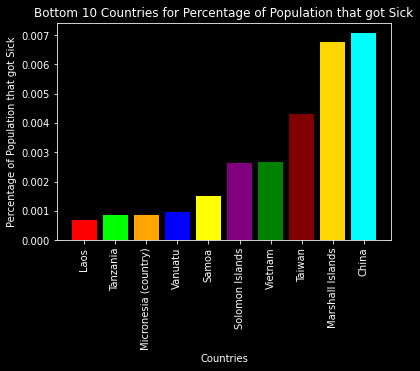

In [190]:
BOTTOM10_PERCENTAGE_SICK_TITLE = "Bottom 10 Countries for Percentage of Population that got Sick"
BOTTOM10_PERCENTAGE_SICK_YLABEL = "Percentage of Population that got Sick"
plt.bar(bottom10_percentage_sick_countries["location"], bottom10_percentage_sick_countries["percentage_sick"], color=COLORS)
plt.title(BOTTOM10_PERCENTAGE_SICK_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(BOTTOM10_PERCENTAGE_SICK_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [192]:
current_day_countries["deaths_per_case"] = (current_day_countries["total_deaths"] / current_day_countries["total_cases"])
current_day_countries["deaths_per_case"]

<ipython-input-192-7047fde75bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_day_countries["deaths_per_case"] = (current_day_countries["total_deaths"] / current_day_countries["total_cases"])


400      0.043913
1212     0.017856
1612     0.026388
2006     0.009628
2382     0.024164
           ...   
76480    0.009984
76913    0.013493
77702    0.207676
78080    0.013628
78456    0.041261
Name: deaths_per_case, Length: 193, dtype: float64

In [193]:
top10_deaths_per_case_countries = current_day_countries.nlargest(10, "deaths_per_case")
top10_deaths_per_case_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population,percentage_sick,deaths_per_case
77702,YEM,Asia,Yemen,2021-03-30,4247.0,132.0,882.0,19.0,NaN,NaN,NaN,NaN,2.982597e+07,0.014239,0.207676
45974,MEX,North America,Mexico,2021-03-30,2232910.0,5067.0,202633.0,801.0,NaN,NaN,NaN,NaN,1.289328e+08,1.731841,0.090748
69146,SYR,Asia,Syria,2021-03-30,18775.0,137.0,1254.0,7.0,NaN,NaN,NaN,NaN,1.750066e+07,0.107282,0.066791
67547,SDN,Africa,Sudan,2021-03-30,31407.0,0.0,2041.0,13.0,NaN,NaN,NaN,NaN,4.384927e+07,0.071625,0.064986
21501,EGY,Africa,Egypt,2021-03-30,201432.0,693.0,11956.0,42.0,NaN,NaN,NaN,NaN,1.023344e+08,0.196837,0.059355
21090,ECU,South America,Ecuador,2021-03-30,327325.0,2201.0,16780.0,34.0,NaN,NaN,NaN,NaN,1.764306e+07,1.855262,0.051264
15289,CHN,Asia,China,2021-03-30,101710.0,18.0,4841.0,0.0,NaN,NaN,NaN,NaN,1.439324e+09,0.007067,0.047596
64694,SOM,Africa,Somalia,2021-03-30,11292.0,128.0,521.0,11.0,NaN,NaN,NaN,NaN,1.589322e+07,0.071049,0.046139
9294,BOL,South America,Bolivia,2021-03-30,271419.0,1072.0,12239.0,28.0,NaN,NaN,NaN,NaN,1.167303e+07,2.325181,0.045093
400,AFG,Asia,Afghanistan,2021-03-30,56384.0,62.0,2476.0,4.0,NaN,NaN,NaN,NaN,3.892834e+07,0.144840,0.043913


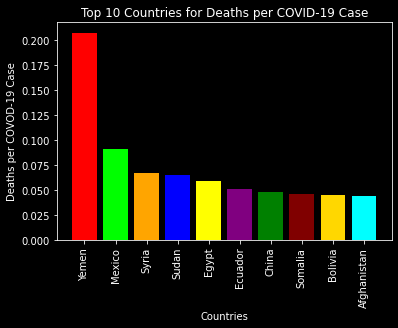

In [197]:
TOP10_DEATHS_PER_CASE_COUNTRIES_TITLE = "Top 10 Countries for Deaths per COVID-19 Case"
DEATHS_PER_CASE_COUNTRIES_YLABEL = "Deaths per COVOD-19 Case"
plt.bar(top10_deaths_per_case_countries["location"], top10_deaths_per_case_countries["deaths_per_case"], color=COLORS)
plt.title(TOP10_DEATHS_PER_CASE_COUNTRIES_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(DEATHS_PER_CASE_COUNTRIES_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [195]:
bottom10_deaths_per_case_countries = current_day_countries.nsmallest(10, "deaths_per_case")
bottom10_deaths_per_case_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population,percentage_sick,deaths_per_case
63331,SGP,Asia,Singapore,2021-03-30,60347.0,26.0,30.0,0.0,NaN,NaN,NaN,NaN,5850343.0,1.031512,0.000497
47213,MNG,Asia,Mongolia,2021-03-30,8447.0,377.0,6.0,0.0,NaN,NaN,NaN,NaN,3278292.0,0.257665,0.000710
8909,BTN,Asia,Bhutan,2021-03-30,872.0,0.0,1.0,0.0,NaN,NaN,NaN,340917.0,771612.0,0.113010,0.001147
57689,QAT,Asia,Qatar,2021-03-30,179184.0,720.0,289.0,3.0,NaN,NaN,NaN,NaN,2881060.0,6.219378,0.001613
11976,BDI,Africa,Burundi,2021-03-30,2757.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,11890781.0,0.023186,0.002176
22634,ERI,Africa,Eritrea,2021-03-30,3279.0,28.0,9.0,0.0,NaN,NaN,NaN,NaN,3546427.0,0.092459,0.002745
43815,MDV,Asia,Maldives,2021-03-30,23838.0,167.0,66.0,0.0,NaN,NaN,NaN,NaN,540542.0,4.410018,0.002769
73944,ARE,Asia,United Arab Emirates,2021-03-30,459360.0,2289.0,1492.0,6.0,NaN,223799.0,37354626.0,NaN,9890400.0,4.644504,0.003248
70753,THA,Asia,Thailand,2021-03-30,28821.0,48.0,94.0,0.0,NaN,NaN,NaN,NaN,69799978.0,0.041291,0.003262
6099,BHR,Asia,Bahrain,2021-03-30,143574.0,905.0,517.0,2.0,NaN,16616.0,3547638.0,502541.0,1701583.0,8.437672,0.003601


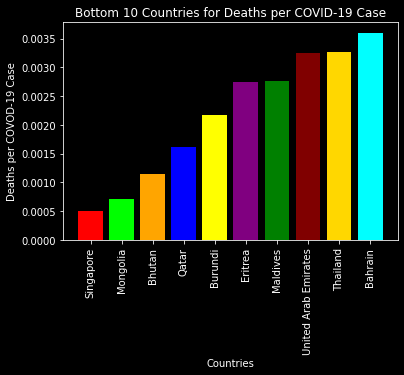

In [199]:
BOTTOM10_DEATHS_PER_CASE_COUNTRIES_TITLE = "Bottom 10 Countries for Deaths per COVID-19 Case"
plt.bar(bottom10_deaths_per_case_countries["location"], bottom10_deaths_per_case_countries["deaths_per_case"], color=COLORS)
plt.title(BOTTOM10_DEATHS_PER_CASE_COUNTRIES_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(DEATHS_PER_CASE_COUNTRIES_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [203]:
countries_with_vaccines = current_day_countries[current_day_countries["people_vaccinated"].notnull()]
countries_with_vaccines

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population,percentage_sick,deaths_per_case
3264,ARG,South America,Argentina,2021-03-30,2332765.0,10154.0,55736.0,125.0,NaN,NaN,NaN,3073630.0,4.519578e+07,5.161467,0.023893
6099,BHR,Asia,Bahrain,2021-03-30,143574.0,905.0,517.0,2.0,NaN,16616.0,3547638.0,502541.0,1.701583e+06,8.437672,0.003601
8909,BTN,Asia,Bhutan,2021-03-30,872.0,0.0,1.0,0.0,NaN,NaN,NaN,340917.0,7.716120e+05,0.113010,0.001147
10450,BRA,South America,Brazil,2021-03-30,12658109.0,84494.0,317646.0,3780.0,NaN,NaN,NaN,14112509.0,2.125594e+08,5.955092,0.025094
11225,BGR,Europe,Bulgaria,2021-03-30,338426.0,5176.0,13068.0,155.0,NaN,19426.0,2078028.0,365650.0,6.948445e+06,4.870529,0.038614
13225,CAN,North America,Canada,2021-03-30,980080.0,3753.0,22892.0,21.0,NaN,NaN,NaN,4791415.0,3.774216e+07,2.596778,0.023357
14855,CHL,South America,Chile,2021-03-30,989492.0,5008.0,23107.0,37.0,NaN,NaN,NaN,6668300.0,1.911621e+07,5.176194,0.023352
17170,CIV,Africa,Cote d'Ivoire,2021-03-30,43542.0,120.0,242.0,3.0,NaN,NaN,NaN,37367.0,2.637828e+07,0.165068,0.005558
18740,CZE,Europe,Czechia,2021-03-30,1523668.0,6896.0,26222.0,186.0,NaN,NaN,NaN,1170662.0,1.070898e+07,14.227944,0.017210
20695,DOM,North America,Dominican Republic,2021-03-30,252384.0,202.0,3317.0,10.0,NaN,NaN,NaN,856474.0,1.084790e+07,2.326569,0.013143


In [210]:
countries_with_vaccines.shape

(47, 15)

In [211]:
top10_vaccinated_countries = countries_with_vaccines.nlargest(10, "people_vaccinated")
top10_vaccinated_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population,percentage_sick,deaths_per_case
74803,USA,North America,United States,2021-03-30,30393701.0,61240.0,550996.0,875.0,NaN,NaN,NaN,96044046.0,3.310026e+08,9.182314,0.018129
32619,IND,Asia,India,2021-03-30,12149335.0,53480.0,162468.0,354.0,NaN,785864.0,242650025.0,53989035.0,1.380004e+09,0.880384,0.013373
10450,BRA,South America,Brazil,2021-03-30,12658109.0,84494.0,317646.0,3780.0,NaN,NaN,NaN,14112509.0,2.125594e+08,5.955092,0.025094
27648,DEU,Europe,Germany,2021-03-30,2818630.0,23681.0,76389.0,250.0,NaN,NaN,NaN,9421702.0,8.378394e+07,3.364165,0.027101
72678,TUR,Asia,Turkey,2021-03-30,3277880.0,37303.0,31385.0,155.0,NaN,NaN,NaN,8614368.0,8.433907e+07,3.886550,0.009575
58513,RUS,Europe,Russia,2021-03-30,4486078.0,8162.0,96817.0,404.0,NaN,NaN,NaN,6886259.0,1.459345e+08,3.074036,0.021582
35537,ITA,Europe,Italy,2021-03-30,3561012.0,16055.0,108879.0,529.0,NaN,NaN,NaN,6816584.0,6.046183e+07,5.889686,0.030575
14855,CHL,South America,Chile,2021-03-30,989492.0,5008.0,23107.0,37.0,NaN,NaN,NaN,6668300.0,1.911621e+07,5.176194,0.023352
35112,ISR,Asia,Israel,2021-03-30,832639.0,514.0,6193.0,-4.0,NaN,NaN,NaN,5236330.0,8.655541e+06,9.619722,0.007438
66734,ESP,Europe,Spain,2021-03-30,3275819.0,4994.0,75305.0,106.0,NaN,NaN,NaN,5092535.0,4.675478e+07,7.006383,0.022988


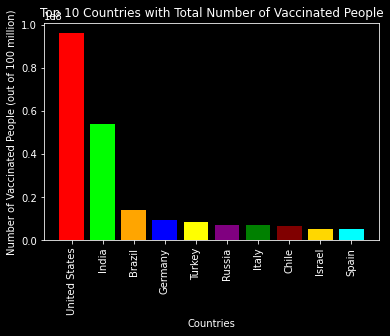

In [214]:
TOP10_VACCINATED_COUNTRIES_TITLE = "Top 10 Countries with Total Number of Vaccinated People"
TOP10_VACCINATED_COUNTRIES_YLABEL = "Number of Vaccinated People (out of 100 million)"
plt.bar(top10_vaccinated_countries["location"], top10_vaccinated_countries["people_vaccinated"], color=COLORS)
plt.title(TOP10_VACCINATED_COUNTRIES_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(TOP10_VACCINATED_COUNTRIES_YLABEL)
plt.xticks(rotation=90)
plt.show()

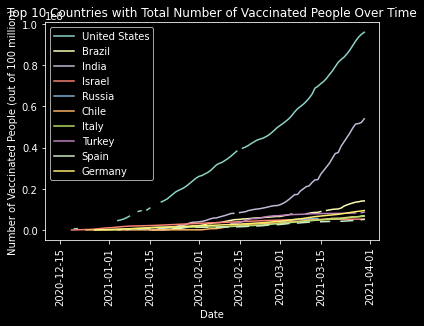

In [217]:
chile = countries[countries["location"] == "Chile"]
israel = countries[countries["location"] == "Israel"]

TOP10_VACCINATED_COUNTRIES_OVER_TIME_TITLE = "Top 10 Countries with Total Number of Vaccinated People Over Time"
TOP10_VACCINATED_COUNTRIES_YLABEL
plt.plot(united_states["date"], united_states["people_vaccinated"], label="United States")
plt.plot(brazil["date"], brazil["people_vaccinated"], label="Brazil")
plt.plot(india["date"], india["people_vaccinated"], label="India")
plt.plot(israel["date"], israel["people_vaccinated"], label="Israel")
plt.plot(russia["date"], russia["people_vaccinated"], label="Russia")
plt.plot(chile["date"], chile["people_vaccinated"], label="Chile")
plt.plot(italy["date"], italy["people_vaccinated"], label="Italy")
plt.plot(turkey["date"], turkey["people_vaccinated"], label="Turkey")
plt.plot(spain["date"], spain["people_vaccinated"], label="Spain")
plt.plot(germany["date"], germany["people_vaccinated"], label="Germany")
plt.legend()
plt.title(TOP10_VACCINATED_COUNTRIES_OVER_TIME_TITLE)
plt.xlabel("Date")
plt.ylabel(TOP10_VACCINATED_COUNTRIES_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [219]:
countries_with_vaccines["percentage_vaccinated"] = (countries_with_vaccines["people_vaccinated"] / countries_with_vaccines["population"]) * 100
countries_with_vaccines["percentage_vaccinated"]

<ipython-input-219-18dab90cb411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_with_vaccines["percentage_vaccinated"] = (countries_with_vaccines["people_vaccinated"] / countries_with_vaccines["population"]) * 100


3264      6.800702
6099     29.533734
8909     44.182439
10450     6.639325
11225     5.262328
13225    12.695128
14855    34.882962
17170     0.141658
18740    10.931590
20695     7.895295
24726    13.590504
25627    15.569083
27648    11.245236
28512    10.367957
31402     6.081109
31794    20.817351
32619     3.912236
34707    40.549440
35112    60.496854
35537    11.274194
36356     0.674391
39515     5.846670
39919     1.874062
41802    12.359369
42996     0.643478
47592     2.850992
48048    11.692595
54481     1.449872
54868     5.737018
56894    10.734870
57293    11.471115
58513     4.718734
60602    25.475868
61752     1.479641
62151    20.794519
62533    64.761033
63721    12.792979
65112     0.424402
65950     1.662211
66734    10.892009
67163     4.219196
67929     4.181142
68353    10.952594
72678    10.213971
73517     0.529486
74803    29.016096
75186    16.840529
Name: percentage_vaccinated, dtype: float64

In [220]:
top10_percentage_vaccinated_countries = countries_with_vaccines.nlargest(10, "percentage_vaccinated")
top10_percentage_vaccinated_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,new_tests,total_tests,people_vaccinated,population,percentage_sick,deaths_per_case,percentage_vaccinated
62533,SYC,Africa,Seychelles,2021-03-30,4114.0,0.0,20.0,0.0,NaN,NaN,NaN,63686.0,98340.0,4.183445,0.004861,64.761033
35112,ISR,Asia,Israel,2021-03-30,832639.0,514.0,6193.0,-4.0,NaN,NaN,NaN,5236330.0,8655541.0,9.619722,0.007438,60.496854
8909,BTN,Asia,Bhutan,2021-03-30,872.0,0.0,1.0,0.0,NaN,NaN,NaN,340917.0,771612.0,0.113010,0.001147,44.182439
34707,IMN,Europe,Isle of Man,2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34480.0,85032.0,NaN,NaN,40.549440
14855,CHL,South America,Chile,2021-03-30,989492.0,5008.0,23107.0,37.0,NaN,NaN,NaN,6668300.0,19116209.0,5.176194,0.023352,34.882962
6099,BHR,Asia,Bahrain,2021-03-30,143574.0,905.0,517.0,2.0,NaN,16616.0,3547638.0,502541.0,1701583.0,8.437672,0.003601,29.533734
74803,USA,North America,United States,2021-03-30,30393701.0,61240.0,550996.0,875.0,NaN,NaN,NaN,96044046.0,331002647.0,9.182314,0.018129,29.016096
60602,SMR,Europe,San Marino,2021-03-30,4678.0,47.0,84.0,0.0,NaN,NaN,NaN,8646.0,33938.0,13.783959,0.017956,25.475868
31794,HUN,Europe,Hungary,2021-03-30,645733.0,4609.0,20435.0,274.0,NaN,NaN,NaN,2011029.0,9660350.0,6.684364,0.031646,20.817351
62151,SRB,Europe,Serbia,2021-03-30,595489.0,9983.0,5270.0,80.0,NaN,NaN,NaN,1414983.0,6804596.0,8.751276,0.008850,20.794519


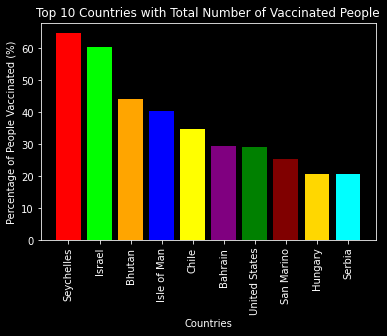

In [222]:
TOP10_PERCENTAGE_VACCINATED_COUNTRIES_TITLE = "Top 10 Countries with Total Number of Vaccinated People"
TOP10_PERCENTAGE_VACCINATED_COUNTRIES_YLABEL = "Percentage of People Vaccinated (%)"
plt.bar(top10_percentage_vaccinated_countries["location"], top10_percentage_vaccinated_countries["percentage_vaccinated"], color=COLORS)
plt.title(TOP10_PERCENTAGE_VACCINATED_COUNTRIES_TITLE)
plt.xlabel(COUNTRIES_XLABEL)
plt.ylabel(TOP10_PERCENTAGE_VACCINATED_COUNTRIES_YLABEL)
plt.xticks(rotation=90)
plt.show()

In [228]:
writer = pd.ExcelWriter(pwd + "/final-data.xlsx", engine="xlsxwriter")
continents.to_excel(writer, sheet_name="Continent_Data", index=False)
current_day_continents.to_excel(writer, sheet_name="Continent_Current_Day", index=False)
countries.to_excel(writer, sheet_name="Country_Data", index=False)
current_day_countries.to_excel(writer, sheet_name="Country_Current_Day", index=False)
top_cases_countries.to_excel(writer, sheet_name="Top_10_Case_Countries", index=False)
bottom_cases_countries.to_excel(writer, sheet_name="Bottom_10_Case_Countries", index=False)
top10_percentage_sick_countries.to_excel(writer, sheet_name="Top_10_Percentage_Sick", index=False)
bottom10_percentage_sick_countries.to_excel(writer, sheet_name="Bottom_10_Percentage_Sick", index=False)
top10_deaths_per_case_countries.to_excel(writer, sheet_name="Top_10_Deaths_Per_Case", index=False)
bottom10_deaths_per_case_countries.to_excel(writer, sheet_name="Bottom_10_Deaths_Per_case", index=False)
countries_with_vaccines.to_excel(writer, sheet_name="Countries_With_Vaccines", index=False)
writer.save()

In [ ]:
# Tableau Visuals: https://public.tableau.com/profile/evan.wayne.jones#!/vizhome/Covid-19Project_16178433767160/CountryMap